In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# read data

In [59]:
cancer = pd.read_csv('breast_cancer_detection.csv')

In [60]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [61]:
cancer.shape

(569, 33)

In [62]:
cancer.size

18777

In [63]:
cancer = cancer.drop(['id','Unnamed: 32'], axis = 1)

In [64]:
cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [65]:
cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:>

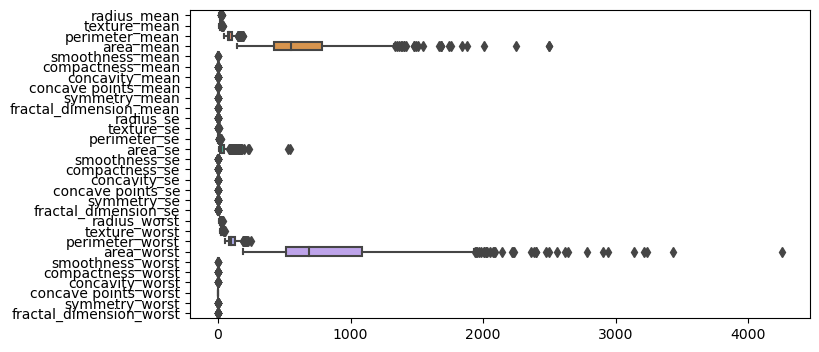

In [66]:
plt.figure(figsize = (8,4))
sns.boxplot(data = cancer,orient = 'h')

In [88]:
for colname,colvals in cancer.iteritems():
    if cancer[colname].dtype!=object and colname!='diagnosis':
        Q1=cancer[colname].quantile(q=0.25)
        Q3=cancer[colname].quantile(q=0.75)
        IQR=Q3-Q1
        low=Q1-(1.5*IQR)
        up=Q3+(1.5*IQR)
        cancer.loc[(cancer[colname]<low) | (cancer[colname]>up) ,colname]=cancer[colname].median()
    else:
           continue

<AxesSubplot:>

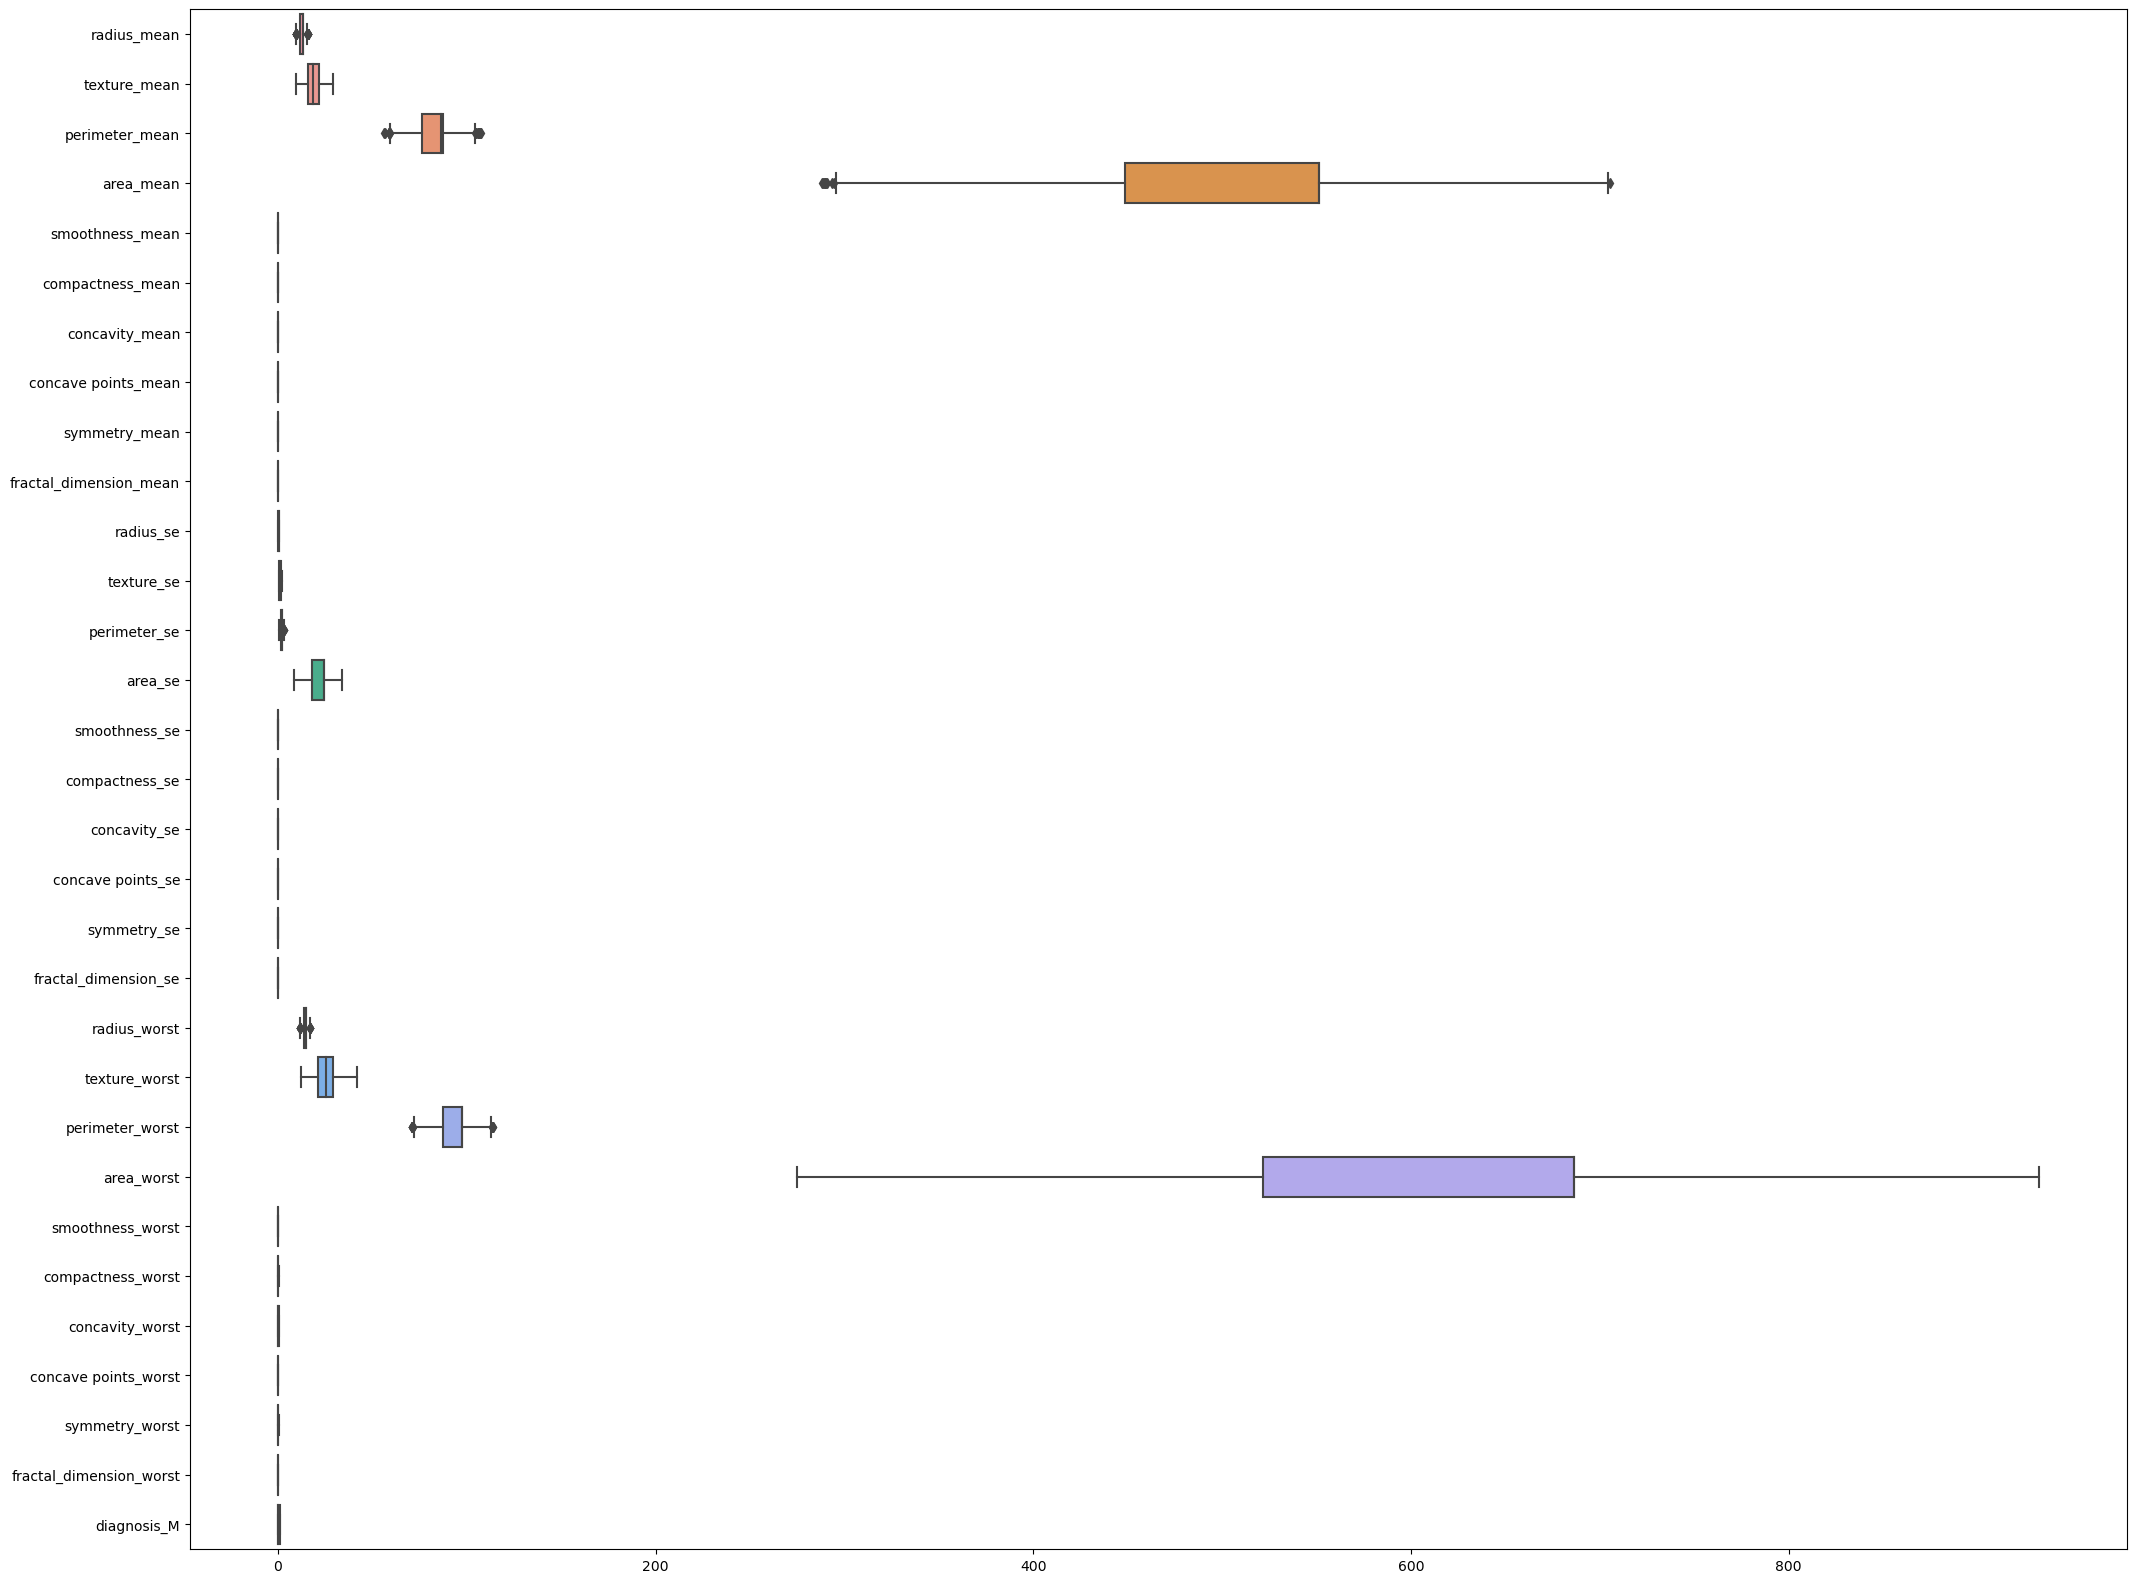

In [89]:
plt.figure(figsize = (25,20))
sns.boxplot(data = cancer,orient = 'h')

In [90]:
cancer=pd.get_dummies(cancer,drop_first=True)
cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,13.37,10.38,86.24,551.1,0.11840,0.09263,0.06154,0.03350,0.2419,0.06154,...,17.33,97.66,686.5,0.1622,0.2119,0.7119,0.2654,0.2822,0.08004,1
1,13.37,17.77,86.24,551.1,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,97.66,686.5,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,13.37,21.25,86.24,551.1,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,97.66,686.5,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.09587,0.09263,0.06154,0.10520,0.1792,0.06154,...,26.50,98.87,567.7,0.1313,0.2119,0.6869,0.2575,0.2822,0.08004,1
4,13.37,14.34,86.24,551.1,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,97.66,686.5,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [91]:
X = cancer.drop('diagnosis_M',axis=1)
y = cancer['diagnosis_M']

In [92]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [93]:
cancer['diagnosis_M'].value_counts()

0    357
1    212
Name: diagnosis_M, dtype: int64

In [94]:
# split the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled,y, test_size = 0.2, random_state = 42)

In [95]:
X_train.size

13650

In [96]:
X_train.shape

(455, 30)

In [97]:
X_test.size

3420

In [98]:
X_test.shape

(114, 30)

In [99]:
#import the model
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [100]:
# fit the model with data

logreg.fit(X_train,y_train)

LogisticRegression()

In [101]:
y_train_pred = logreg.predict(X_train)

In [102]:
y_test_pred = logreg.predict(X_test)

In [103]:
model_score = logreg.predict(X_test)

In [104]:
from sklearn import metrics
# accuracy measures by classification report
result = metrics.classification_report(y_train,y_train_pred)
# print the result
print(result)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       286
           1       0.97      0.96      0.97       169

    accuracy                           0.98       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.98      0.98      0.98       455



In [105]:
from sklearn import metrics
# accuracy measures by classification report
result = metrics.classification_report(y_test,y_test_pred)
# print the result
print(result)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



#### An exploratory approach using various EDA techniques. An implementation of a machine learning model Logistic Regression gave 0.96 Accuracy on test data for breast cancer dataset.
